### Q1 Linear Regression Analysis for Wine Quality
(a) (10%) Show the results of regression analysis as follows  
(b) (5%) The fitting of the linear regression is a good idea? If yes, why? If no, why? What’s the possible reason of poor fitting?

- https://medium.com/swlh/interpreting-linear-regression-through-statsmodels-summary-4796d359035a
- https://medium.com/qiubingcheng/%E5%9B%9E%E6%AD%B8%E5%88%86%E6%9E%90-regression-analysis-%E7%9A%84r%E5%B9%B3%E6%96%B9-r-squared-%E8%88%87%E8%AA%BF%E6%95%B4%E5%BE%8Cr%E5%B9%B3%E6%96%B9-adjusted-r-squared-f38ad733bc4e
- https://www.jmp.com/en_us/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

In [ ]:
# ! conda install --file requirements.txt # use pip conda dont provide mlxtend
# ! pip install -r requirements.txt
# ! pip install --upgrade scikit-learn

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer

import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import seaborn as sns 

sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

In [2]:
# def plot(df, y):
#     xs = [x for x in df.columns if x != y]
#     plt.figure(figsize=(12, 8))
#     for i, x in enumerate(xs):
#         plt.subplot((len(xs)+1)//2, 2, i+1)
#         plt.scatter(df[x], df[y])
#         plt.xlabel(x)
#         plt.ylabel(y)
#     plt.show()

def check_norm(resid):
    plt.hist(resid, bins = 'auto')
    plt.show()
    
    sm.qqplot(resid, stats.norm, fit=True, line='45')
    plt.show()
    
    stat, p = stats.shapiro(resid)
    print(f'Shapiro: statistics={stat:.3f}, p={p:.3f}')

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    outliers = []
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [3]:
furnace_data = pd.read_csv("MDS_Assignment1_furnace.csv")
print(furnace_data.shape)
display(furnace_data)

(620, 29)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f19,f20,f21,f22,f23,f24,f25,f26,f27,grade
0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129,2
1,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129,4
2,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129,2
3,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129,2
4,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-0.684962,-0.406121,-0.687687,0.271886,-0.232472,0.102129,2
616,-0.379487,3.809407,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,2.248407,-0.332678,-0.687687,0.271886,4.519156,0.102129,2
617,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,-1.023427,1.332042,-0.687687,0.271886,-0.232472,0.102129,2
618,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,0.0,...,0.085505,0.233285,-1.080663,3.150982,-1.777067,-0.687687,0.271886,-0.232472,0.102129,2


In [5]:
furnace_X = furnace_data.iloc[:, :-1] # params
furnace_y = furnace_data.iloc[:, -1] # label
furnace_X_const = sm.add_constant(furnace_X) # 做線性回歸前 要手動加上截距(常數項)
furnace_X_const = furnace_X_const.rename(columns={"const": "Intercept"})
display(furnace_X_const)
print('labels are:', set(furnace_y))

,Intercept,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
0,1.0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,0.443257,-0.406121,-0.687687,0.271886,3.727218,0.102129
1,1.0,-0.825098,-0.264250,3.032397,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,-0.232546,-0.406366,-0.687687,0.271886,-0.232472,0.102129
2,1.0,1.848564,-0.264250,-0.461423,0.409400,1.305455,2.329398,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,1.459782,1.221876,1.877777,0.271886,-0.232472,0.102129
3,1.0,0.511733,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,-0.008030,-0.406366,1.504523,0.271886,-0.232472,0.102129
4,1.0,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,0.925358,-0.573268,-1.164793,1.877777,0.271886,-0.232472,0.102129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1.0,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,-0.684962,-0.406121,-0.687687,0.271886,-0.232472,0.102129
616,1.0,-0.379487,3.809407,-0.461423,0.409400,1.305455,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,2.248407,-0.332678,-0.687687,0.271886,4.519156,0.102129
617,1.0,-0.825098,-0.264250,-0.461423,0.409400,-0.525726,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,-1.023427,1.332042,-0.687687,0.271886,-0.232472,0.102129
618,1.0,-0.825098,-0.264250,2.004803,-2.442599,1.305455,-0.276144,0.370965,0.090167,0.107958,...,0.182574,0.085505,0.233285,-1.080663,3.150982,-1.777067,-0.687687,0.271886,-0.232472,0.102129


labels are: {0, 1, 2, 3, 4}


- `R-squared`: the measurement of how much of the independent variable is explained by changes in our dependent variables.
    - 統計結果的 R-squared 是 0.495，表示模型能解釋變數們 49.5% 的變量。看似沒問題。
    - Adj. R-squared 的結果雷同。
- `Prob (F-Statistic)`: this number to tell you the accuracy of the null hypothesis(H0), or whether it is accurate that your variables’ effect is 0. 
    - H0 是殘差正常的假設。
    - 統計結果的 `Prob (F-Statistic)` 很小，為 1.16e-70，因此我們拒絕此假設，也表示此數據不太適合做 linear regression。

In [6]:
furnace_model = sm.OLS(furnace_y, furnace_X_const)
furnace_result = furnace_model.fit()
print(furnace_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  grade   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     21.52
Date:                Wed, 05 Oct 2022   Prob (F-statistic):           1.16e-70
Time:                        11:36:11   Log-Likelihood:                -381.52
No. Observations:                 620   AIC:                             819.0
Df Residuals:                     592   BIC:                             943.1
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0339      0.018    110.528      0.0

(c) (5%) Based on the results, rank the independent variables by p values and which one are statistically significant variables with p values<0.01? (i.e. 重要變數挑選 )

In [7]:
furnace_pvalues = furnace_result.pvalues
print(furnace_pvalues.sort_values().head()) # p 越小影響力越大
print(furnace_pvalues.sort_values().tail()) # p 越大影響力越小

Intercept    0.000000e+00
f18          6.355895e-19
f2           2.430368e-18
f14          6.896905e-18
f15          3.971326e-08
dtype: float64
f23    0.658648
f27    0.746419
f0     0.823180
f4     0.927523
f12    0.978520
dtype: float64


In [8]:
# 挑選影響力大的變數 p < 0.01
for i in range(len(furnace_pvalues.sort_values())):
    if furnace_pvalues.sort_values()[i] < 0.01:
        print(furnace_pvalues.sort_values().index[i])

Intercept
f18
f2
f14
f15
f22
f17
f25
f6


(d) (15%) Testify the underlying assumptions of regression (1) Normality, (2) Independence, and (3) Homogeneity of Variance with respect to residual.
- Normality: Shapiro-Wilk test 常態性假設
- Independence: Durbin-Watson test 獨立性假設
- Homogeneity: Breusch-Pagan test 異質變異數

#### Normality check
$H_0$ : the residual is normal  
$H_1$ : the residual is not normal

Result: The residual is not normal. Because `Shapiro: statistics=0.935, p=0.000`.

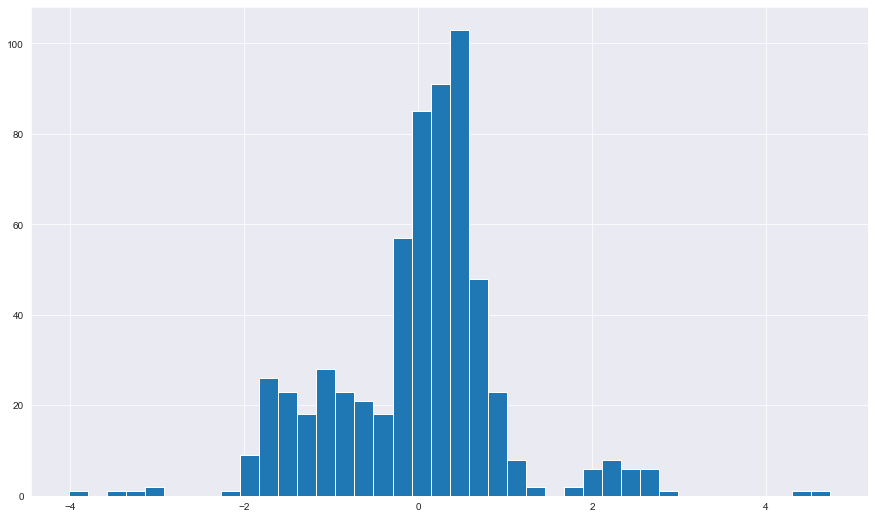

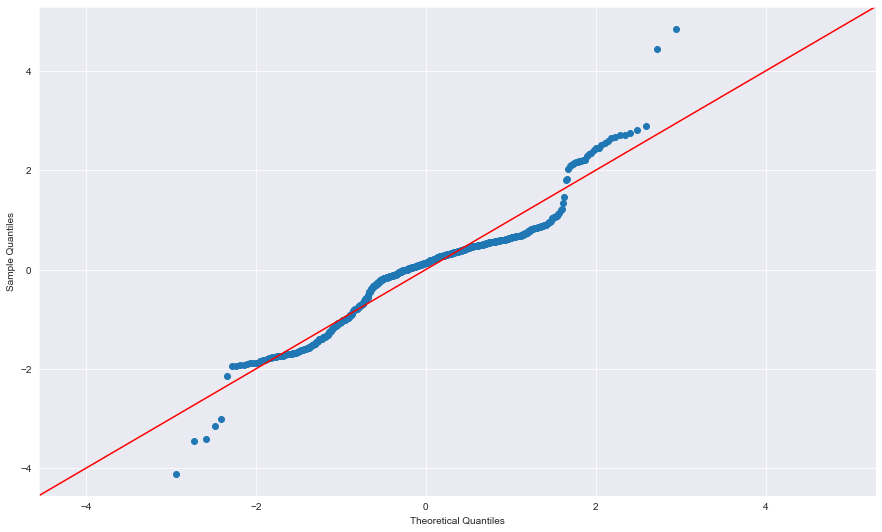

Shapiro: statistics=0.935, p=0.000


In [9]:
check_norm(furnace_result.resid_pearson)

 
#### Check Homoscedasticity assumption
$H_0:$ Homoscedasticity  
$H_1:$ Hetroscedasticity

Result: BP test shows hetroscedasticity, GQ test shows homoscedasticity.

c:\Users\Weber\.conda\envs\testAI\lib\site-packages\statsmodels\stats\outliers_influence.py:696: RuntimeWarning: invalid value encountered in sqrt
  return self.resid / sigma / np.sqrt(1 - hii)



 Breusch-Pagan test ----
                                      value
Lagrange multiplier statistic  1.406203e+02
p-value                        5.871843e-17
f-value                        6.431711e+00
f p-value                      5.311816e-20

 Goldfeld-Quandt test ----
                value
F statistic  1.024212
p-value      0.420429

 Residuals plots ----


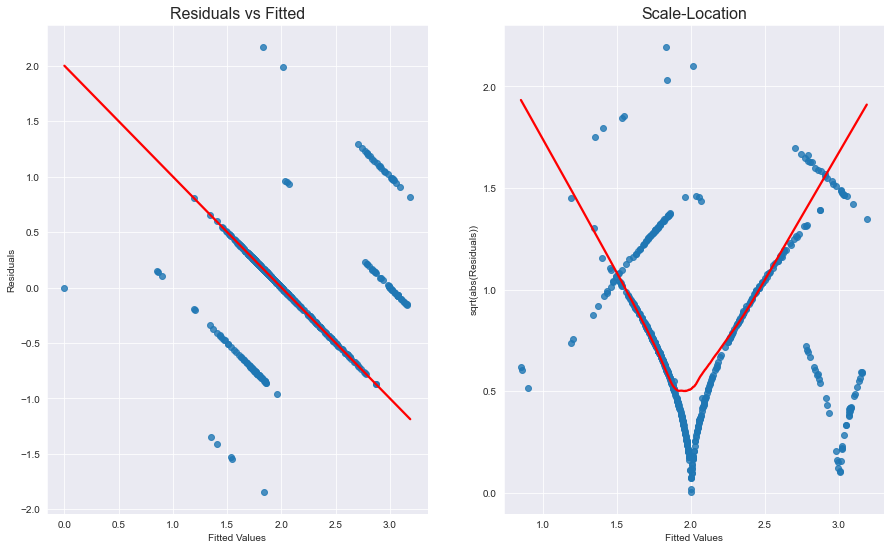

In [10]:
homoscedasticity_test(furnace_result)

#### Independent assumption
Result: None of the VIF value of the features > 5, therefore, no significant multicolinearity within the variables.

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(furnace_X_const.values, i) for i in range(furnace_X_const.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=furnace_X.columns).T

c:\Users\Weber\.conda\envs\testAI\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27
vif,1.81784,2.314364,3.571219,5.095433,4.30931,2.623037,1.983188,2.24362,1.054478,NaN,...,1.266249,2.060656,1.12521,2.356358,1.319547,1.162346,1.7176,1.17451,1.449481,1.085164


In [18]:
# check 5 個最大的
sorted(vif[1:])[-5:]

[2.6230370997705044,
 3.571219493243316,
 4.309309658296664,
 5.095432553979494,
 nan]

### Q2 Association rules
ref:
- http://rasbt.github.io/mlxtend/user_guide/preprocessing/TransactionEncoder/
- http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
- https://pbpython.com/market-basket-analysis.html

Read File and make data in to boolean matrix

In [ ]:
trans = []
with open("MDS_Assignment1_groceries.csv", "r") as file:
    lines = file.readlines()
    trans = [line.rstrip().split(",") for line in lines]
    del lines
trans[:2]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee']]

In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)
trans_bool = pd.DataFrame(te_ary, columns=te.columns_)
trans_bool

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
print('num of transactions:', trans_bool.shape[0], '\nnum of grocery items:', trans_bool.shape[1])

num of transactions: 9835 
num of grocery items: 171


Apply apriori frequent mining
- Set the minimum support to `0.001` (itemset 發生頻率)
- Set the minimum confidence of `0.15` (itemset 中條件機率P(B|A))
- 解讀: antecedents -> consequents

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(trans_bool, min_support=0.001, use_colnames=True)
print(len(frequent_itemsets))
frequent_itemsets.head()

13488


,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.003559,(abrasive cleaner)
3,0.003254,(artif. sweetener)
4,0.017692,(baking powder)


In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=-1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(Instant food products),0.110524,0.008033,0.001017,0.009200,1.145296,0.000129,1.001178
1,(Instant food products),(bottled water),0.008033,0.110524,0.001017,0.126582,1.145296,0.000129,1.018386
2,(butter),(Instant food products),0.055414,0.008033,0.001220,0.022018,2.741145,0.000775,1.014301
3,(Instant food products),(butter),0.008033,0.055414,0.001220,0.151899,2.741145,0.000775,1.113765
4,(citrus fruit),(Instant food products),0.082766,0.008033,0.001118,0.013514,1.682347,0.000454,1.005556


Pick top 5 rules, pick by confidence in order.

In [ ]:
conf_rules = rules[rules['confidence'] >= 0.15].sort_values(by=['confidence', 'antecedent support'], ascending=False)
conf_rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
73399,"(root vegetables, flour, whipped/sour cream)",(whole milk),0.001729,0.255516,0.001729,1.0,3.913649,0.001287,inf
99065,"(oil, root vegetables, other vegetables, yogurt)",(whole milk),0.001423,0.255516,0.001423,1.0,3.913649,0.001060,inf
44771,"(rice, sugar)",(whole milk),0.001220,0.255516,0.001220,1.0,3.913649,0.000908,inf
92855,"(whipped/sour cream, other vegetables, butter,...",(whole milk),0.001220,0.255516,0.001220,1.0,3.913649,0.000908,inf
95133,"(tropical fruit, root vegetables, whipped/sour...",(other vegetables),0.001220,0.193493,0.001220,1.0,5.168156,0.000984,inf


In [ ]:
lift_rules = rules[rules['confidence'] >= 0.15].sort_values(by='lift', ascending=False)
lift_rules[:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10430,(liquor),"(bottled beer, red/blush wine)",0.011083,0.004881,0.001932,0.174312,35.715787,0.001878,1.205200
10427,"(bottled beer, red/blush wine)",(liquor),0.004881,0.011083,0.001932,0.395833,35.715787,0.001878,1.636828
102519,"(tropical fruit, whole milk, oil)","(root vegetables, other vegetables, yogurt)",0.002542,0.012913,0.001017,0.400000,30.976378,0.000984,1.645145
102528,"(oil, root vegetables, yogurt)","(tropical fruit, whole milk, other vegetables)",0.001932,0.017082,0.001017,0.526316,30.811404,0.000984,2.075049
102263,"(other vegetables, whole milk, yogurt, domesti...","(tropical fruit, butter)",0.003355,0.009964,0.001017,0.303030,30.411255,0.000983,1.420486


Give a visualization graph of your association rules.

In [ ]:
def draw_graph(rules, rules_to_show):
  import networkx as nx  
  G1 = nx.DiGraph()

  color_map=[]
  N = 50
  colors = np.random.rand(N)    
  strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11']   
   
   
  for i in range (rules_to_show): 
    G1.add_nodes_from(["R"+str(i)])
    
     
    for a in rules.iloc[i]['antecedents']:
                
        G1.add_nodes_from([a])
        
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
       
    for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)
 
  for node in G1:
       found_a_string = False
       for item in strs: 
           if node==item:
                found_a_string = True
       if found_a_string:
            color_map.append('yellow')
       else:
            color_map.append('green')
  ed = G1.edges()
#   print(edges)
  colors = [G1[u][v]['color'] for u,v in ed]
  weights = [G1[u][v]['weight'] for u,v in ed]
 
  pos = nx.spring_layout(G1, k=16, scale=1)
  nx.draw(G1, pos, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            
   
  for p in pos:  # raise text positions
           pos[p][1] += 0.07
  nx.draw_networkx_labels(G1, pos)
  plt.show()

<AxesSubplot:title={'center':'Association Rules'}, xlabel='support', ylabel='confidence'>

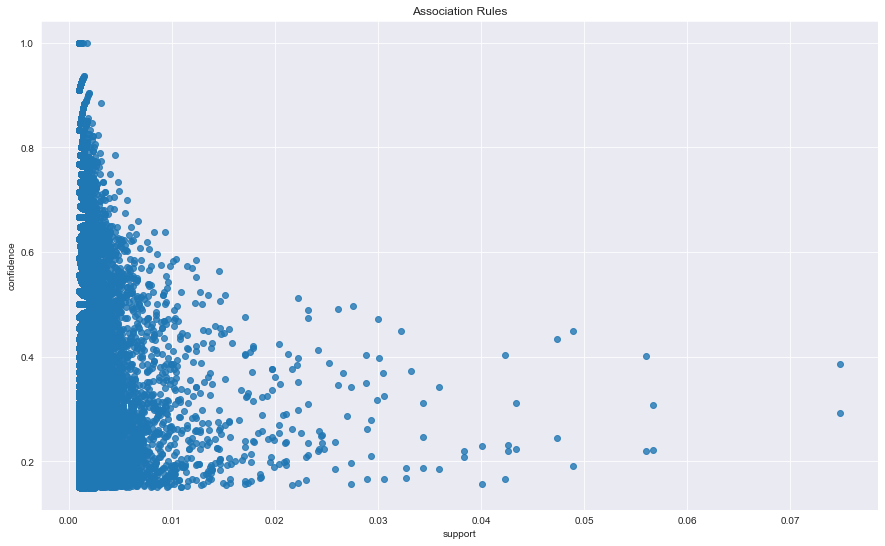

In [ ]:
support=conf_rules['support']
confidence=conf_rules['confidence']
 
import seaborn as sns1
 
# for i in range (len(support)):
#     support[i] = support[i] 
#     confidence[i] = confidence[i] 
     
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')    
sns1.regplot(x=support, y=confidence, fit_reg=False)

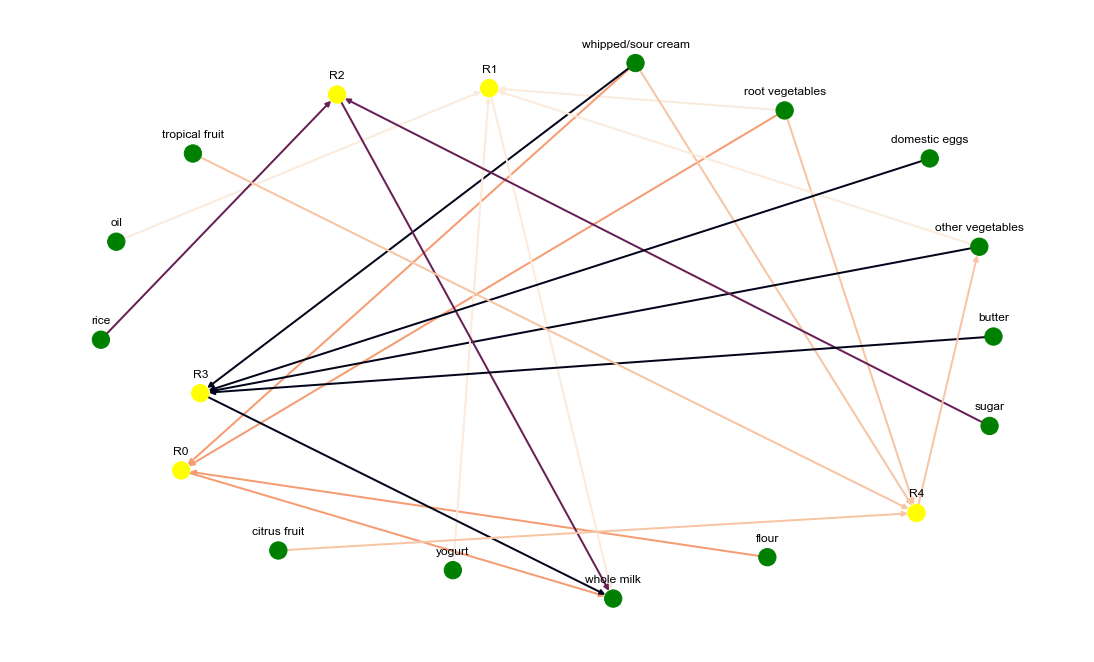

In [ ]:
draw_graph(conf_rules, 5) # top 5 rules

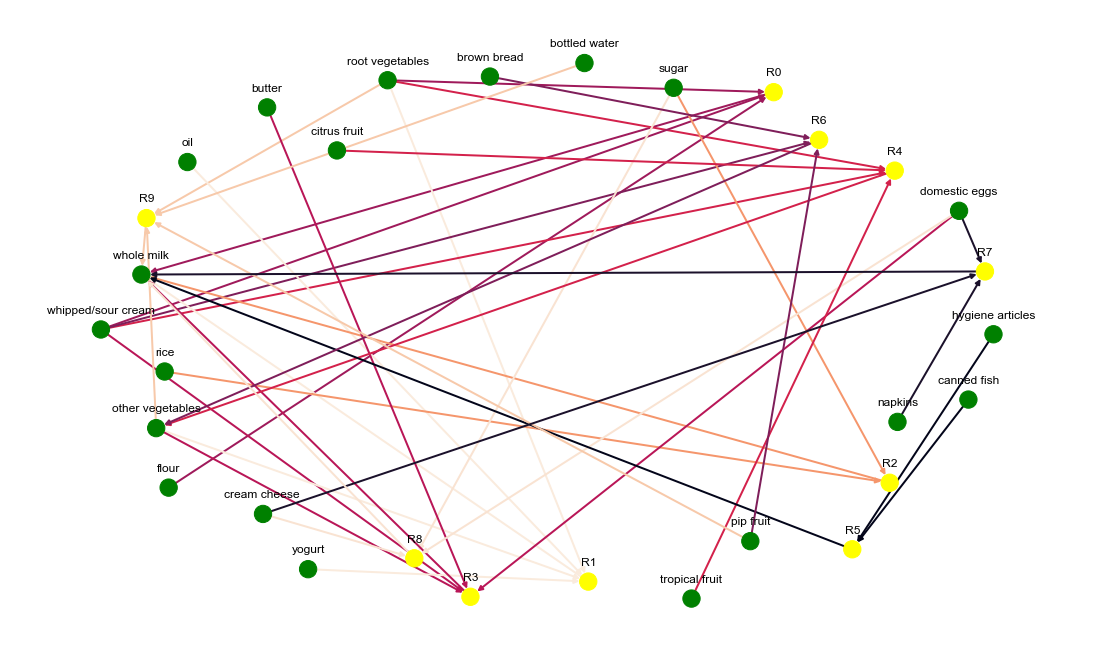

In [ ]:
draw_graph(conf_rules, 10)

### Q3 Manufacturing System Analysis
(a) (10%)根據 Little’s Law 試 計算各工作站的產出率 TH於下表試問
瓶頸站的產出率𝑟𝑏、最小生產週期時間 (總加工時間， 𝑇0)、關鍵在製品水準 (𝑊0)各為多少？  
Notes: `𝑊0 = 𝑟𝑏 * 𝑇0`。

In [1]:
import numpy as np                # 資料處理套件
import pandas as pd               # 資料處理套件
import matplotlib.pyplot as plt   # 資料視覺化套件
import math

Minima throughput rb is 0.375 at station 2


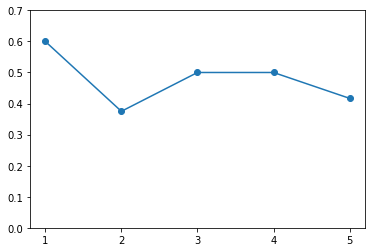

In [2]:
station_TH = [3/5, 3/8, 6/12, 2/4, 5/12]
rb = min(station_TH)
xi = list(range(1, 5+1))
plt.ylim(0,0.7)
plt.xticks(xi, xi)
plt.plot(xi, station_TH, marker='o')
print('Minima throughput rb is', rb, 'at station', station_TH.index(rb)+1)

In [3]:
T0 = 5 + 8 + 12 + 4 + 12
W0 = rb*T0
print("rb:", rb)
print("T0:", T0)
print("W0:", W0)

rb: 0.375
T0: 41
W0: 15.375


(b) (10%)試 給出最佳績效 (best case)下，最大的產出率 (THbest)與最小生產週期時間 (CTbest)的計算公式 (提示 講義 22 29頁 )

In [4]:
# critical WIP's param
rb = 0.375
T0 = 41
W0 = 15.375

def THbest(w):
    '''最大產出率'''
    if w <= W0:
        return w/T0 # 投料過少
    return rb # 投料適中or過多，TH為瓶頸站產量

def CTbest(w):
    ''' 最小生產週期時間 '''
    if w <= W0:
        return T0 # 最短周期
    return w/rb # 投量過多，TH為瓶頸站產量，所需時間遞增

(c) (10%)根據該問題的產線，試程式撰寫建立一模擬模型 (或用套裝軟體、數值分析 )來驗證，當在製品 WIP數量超過工廠產能時，其生產週期將嚴重惡化。也就是當產線的投料速度 (投產量 )大於產線的產出率，此時生產系統將處於非穩態的狀態 (non steady state)。試用圖表呈現 WIP、 CT與 TH之間惡化的關係。 (提示 講義22 29頁 )

C:\Users\luweb\AppData\Local\Temp\ipykernel_10012\3400190010.py:33: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


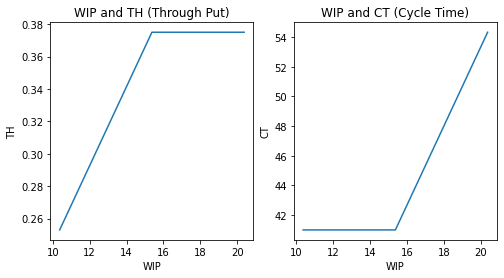

In [5]:
# 橫軸: WIP
# 縱軸: CT、TH 各一張圖

data_WIP = list(range(-5,5+1))
data_WIP = [w+W0 for w in data_WIP] # WIP的資料點 需要包含citical WIP
data_CT = [CTbest(w) for w in data_WIP] # 生產週期
data_TH = [THbest(w) for w in data_WIP] # 產能

fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,2,1)
ax.plot(data_WIP, data_TH)
ax.set_title('WIP and TH (Through Put)')
ax.set_xlabel("WIP")
ax.set_ylabel("TH")
# plt.subplot(1,2,1)
# plt.plot(data_WIP, data_TH)
# plt.title('WIP and TH (Through Put)')
# plt.xlabel("WIP")
# plt.ylabel("TH")

ax_2 = fig.add_subplot(1,2,2)
ax_2.plot(data_WIP, data_CT)
ax_2.set_title('WIP and CT (Cycle Time)')
ax_2.set_xlabel("WIP")
ax_2.set_ylabel("CT")
# plt.subplot(1,2,2)
# plt.plot(data_WIP, data_CT)
# plt.title('WIP and CT (Cycle Time)')
# plt.xlabel("WIP")
# plt.ylabel("CT")

# plt.show()
fig.show()